1 set up development enviroment and API access to use Gemini.

2 generate text response from text input

3 generate text response from multimodal inputs

4 Use Gemini for multi-turn conversetion(chat)

5 Use embedding for LLM


In [1]:
!pip install -q -U google-generativeai

In [3]:
# Import necessary packages
import pathlib
import textwrap

import google.generativeai as genai
from IPython.display import Markdown, display


def to_markdown(text):
  text = text.replace('.', '  *')
  return Markdown(textwrap.indent(text, '>' , predicate= lambda _: True))

In [4]:
# Used to securely store API key

from google.colab import userdata

In [5]:
# passing google API key

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

In [6]:
# List models
# call the gemini API. Use list_models to see available Gemini models
#gemini pro: optimized for text only prompts
# gemini_pro_vision : optimized got text and image prompt



for m in genai.list_models():
  print(f'{m.name}: {m.description}')

models/chat-bison-001: A legacy text-only model optimized for chat conversations
models/text-bison-001: A legacy model that understands text and generates text as an output
models/embedding-gecko-001: Obtain a distributed representation of a text.
models/gemini-1.0-pro-latest: The original Gemini 1.0 Pro model. This model will be discontinued on February 15th, 2025. Move to a newer Gemini version.
models/gemini-1.0-pro: The best model for scaling across a wide range of tasks
models/gemini-pro: The best model for scaling across a wide range of tasks
models/gemini-1.0-pro-001: The original Gemini 1.0 Pro model version that supports tuning. Gemini 1.0 Pro will be discontinued on February 15th, 2025. Move to a newer Gemini version.
models/gemini-1.0-pro-vision-latest: The original Gemini 1.0 Pro Vision model version which was optimized for image understanding. Gemini 1.0 Pro Vision was deprecated on July 12, 2024. Move to a newer Gemini version.
models/gemini-pro-vision: The original Gemin

In [7]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-pro-exp-0827
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-exp-0827
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/learnlm-1.5-pro-experimental
models/gemini-exp-1114
models/gemini-exp-1121


In [8]:
# Ex. For text only  prompt use gemini-pro model

model = genai.GenerativeModel('gemini-pro')

In [9]:
model

genai.GenerativeModel(
    model_name='models/gemini-pro',
    generation_config={},
    safety_settings={},
    tools=None,
    system_instruction=None,
    cached_content=None
)

In [10]:
%%time
response = model.generate_content("Why I am not getting a JOB?")

CPU times: user 166 ms, sys: 24.8 ms, total: 191 ms
Wall time: 9.68 s


In [11]:
response

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "**Internal Factors:**\n\n* **Lack of relevant skills or experience:** Ensure you have the necessary qualifications, skills, and experience for the positions you're applying for.\n* **Poor resume and cover letter:** Create a well-written resume and cover letter that effectively highlight your skills and experience.\n* **Unsatisfactory interviewing skills:** Practice your interviewing techniques, prepare for common questions, and dress professionally.\n* **Low self-confidence:** Believe in your abilities and demonstrate confidence in interviews.\n* **Limited networking:** Attend industry events, connect with professionals, and build your professional network.\n* **Bias or discrimination:** Address any potential biases or discriminatory practices faced during t

In [14]:
# Ex. For gemini-1.5-flash-latest ----->
# Alias that points to the most recent production (non-experimental) release of Gemini 1.5 Flash, our fast and versatile multimodal model for scaling across diverse tasks.
model = genai.GenerativeModel('models/gemini-1.5-flash-latest')

In [15]:
model

genai.GenerativeModel(
    model_name='models/gemini-1.5-flash-latest',
    generation_config={},
    safety_settings={},
    tools=None,
    system_instruction=None,
    cached_content=None
)

In [16]:
%%time
response = model.generate_content("Why I am not getting a JOB?")

CPU times: user 175 ms, sys: 21.8 ms, total: 197 ms
Wall time: 10.5 s


In [19]:
response

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "There's no single answer to why you're not getting a job, as it's a multifaceted issue.  To help you figure it out, let's break down some potential reasons:\n\n**Resume & Cover Letter:**\n\n* **Keywords:** Are you using relevant keywords from job descriptions?  Applicant Tracking Systems (ATS) often screen resumes based on keywords.\n* **Formatting:** Is your resume easy to read and visually appealing? Is it tailored to each job application?  Generic resumes rarely stand out.\n* **Content:** Does your resume clearly highlight your skills and accomplishments, quantifying them whenever possible (e.g., \"Increased sales by 15%\")? Are you focusing on your transferable skills even if your experience isn't directly related?\n* **Cover Letter:** Does your cover le

In [20]:
to_markdown(response.text)

>There's no single answer to why you're not getting a job, as it's a multifaceted issue  *  To help you figure it out, let's break down some potential reasons:
>
>**Resume & Cover Letter:**
>
>* **Keywords:** Are you using relevant keywords from job descriptions?  Applicant Tracking Systems (ATS) often screen resumes based on keywords  *
>* **Formatting:** Is your resume easy to read and visually appealing? Is it tailored to each job application?  Generic resumes rarely stand out  *
>* **Content:** Does your resume clearly highlight your skills and accomplishments, quantifying them whenever possible (e  *g  *, "Increased sales by 15%")? Are you focusing on your transferable skills even if your experience isn't directly related?
>* **Cover Letter:** Does your cover letter personalize your application, showcasing why *you* are the best fit for *that specific* role and company?  A generic cover letter is often overlooked  *
>
>**Job Search Strategy:**
>
>* **Networking:** Are you actively networking?  Many jobs are filled through networking before they're even advertised  *
>* **Job Boards:** Are you using a variety of job boards and company websites? Don't rely solely on one source  *
>* **Targeting:** Are you applying for jobs you're actually qualified for and genuinely interested in? Applying for too many unrelated jobs can dilute your efforts  *
>* **Application Process:** Are you following the application instructions carefully? Incomplete or poorly submitted applications often get rejected  *
>* **Persistence:** Job hunting takes time and effort  *  Don't get discouraged if you don't hear back immediately  *
>
>**Skills & Experience:**
>
>* **Skills Gap:** Do you have the necessary skills and experience for the jobs you're applying for? Consider upskilling or taking courses to bridge any gaps  *
>* **Transferable Skills:** Are you highlighting transferable skills that could be valuable in different industries or roles?
>* **Experience Level:** Are you aiming for roles that match your experience level?  Applying for jobs far above or below your experience can be detrimental  *
>
>**Other Factors:**
>
>* **Location:** Is your location limiting your job options? Consider relocating if necessary  *
>* **Salary Expectations:** Are your salary expectations realistic for your experience and the job market in your area?
>* **Interview Skills:** Are you practicing your interviewing skills?  Practice answering common interview questions and prepare examples to demonstrate your abilities  *
>* **Background Checks:** Are there any potential issues in your background that could be hindering your job search?
>* **Competition:** The job market can be competitive  *  Many qualified candidates apply for the same positions  *
>
>**What to Do Next:**
>
>1  * **Self-Assessment:** Honestly evaluate your resume, cover letter, job search strategy, and skills  *
>2  * **Seek Feedback:** Ask friends, family, career counselors, or mentors to review your resume and cover letter and provide constructive criticism  *
>3  * **Practice:** Practice your interviewing skills and research the companies you're applying to  *
>4  * **Network:** Attend industry events, connect with people on LinkedIn, and reach out to your professional contacts  *
>5  * **Persistence:** Don't give up! Keep applying, refining your approach, and learning from each experience  *
>
>
>If you can provide more details about your job search (e  *g  *, the types of jobs you're applying for, your experience level, your location), I can give you more specific advice  *


In [24]:
response.prompt_feedback
# If API faield to return a result, we use response.prompt_feedback to see if it
# was blocked by due to any safety concern
# if output is null for response.prompt_feedback then we can say our API is Successfull

In [25]:
%%time
response = model.generate_content("Why I am not getting a JOB?", stream=True)

CPU times: user 133 ms, sys: 19.4 ms, total: 152 ms
Wall time: 7.83 s


In [29]:
for chunk in response:
  print(chunk.text , end='')
  print("_"*80)

There________________________________________________________________________________
's no single answer to why you're not getting a job, as________________________________________________________________________________
 it's a multifaceted issue.  To help you figure it out, let________________________________________________________________________________
's explore some potential reasons:

**Your Job Search Strategy:**

* **Insufficient Networking:** Are you actively networking?  Reaching out to people in your________________________________________________________________________________
 field, attending industry events, and using LinkedIn effectively can significantly increase your chances.
* **Poor Resume and Cover Letter:**  Is your resume tailored to each________________________________________________________________________________
 job application? Does it highlight your relevant skills and accomplishments using action verbs? Is your cover letter compelling and personaliz

# ***Generate Text from Images and Text Inputs***

In [ ]:
# gemini-pro-vision accept both text and image inputs.
# GenerativeModel.generate_content API is designed to handle multimodal prompts and return a text output

In [ ]:
# uing !curl -o image.jpg ----> to download image using image URL

In [71]:
# ! curl is not working
!curl -o image.jpg https://i.pinimg.com/736x/99/25/c5/9925c552a5f3bb72cc58111437f55e56.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 71055  100 71055    0     0   290k      0 --:--:-- --:--:-- --:--:--  291k


In [73]:
'''
import base64

# Base64 string for the image
image_base64 = '/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhISEhISEhUVFRUVFRAVFQ8VEBUVFRUXFhUVFRUYHSggGBolGxYVITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OFxAQGi0dHx0rLSstLS0tLSsrKy0rLS0rLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIARYAtQMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAADAAIEBQYBBwj/xAA9EAABAwIEAwUFBwIGAwEAAAABAAIRAyEEBRIxBkFRImFxgZETMqGxwQcjQlLR4fBi8TNygpKishQVc1P/xAAaAQACAwEBAAAAAAAAAAAAAAACAwABBAUG/8QAJREAAgICAgIBBAMAAAAAAAAAAAECEQMhEjEEQVETIjJCBYGh/9oADAMBAAIRAxEAPwCPhcO7mVY4fClKnTJVlh6VlpEA6dAo3/jSihqbWeRYKEOMw0c0gDO6LTaUqlNQgSmUTSVFae9S6ZULOnZDAKk6ENzFCEeq0myj0sGZnUVY+zTmU4VEBNpJ8LhqJOqAXJA+ShKOEJpXRWaTGoeoXMWw6Tp3UINeVzSo2Dw7vxlS6zgBvClkAVHQmgJjaZJmUVrVCDSEOowKQWLj6YRIorn0wkpRpBcRFEehTU5qB7UATCJSxYO4hAWSKYXH0ZMptHFNJhH0FQgOo2EGo8kQArBjUnGOShZVUsA6ZJVhSpFSGv6rusbqiC0IGKrMYJe9rP8AMQPmsbxPx+2mTTw5BjeruD3UxzH9Rt0ndee4/iCrVMuc6+5nfuPXzlBKaGLGz2j/AN1Q29oDeLNcdupiFU53xdTpN00vvHnbkwd5K8h/9i8XD3erp9UwZo7mSUDmGoIvs2zvEVjJqv8A8rYaweEX9SqlmZVmkh1SoO/U4IYzGdvOfoVHr5gXAtNx3obGcS0bm9eOzXqD/U6PRa3J+PqrAGVabaoFtQOl8AWncE+i80pPgyPRT3VYG5mw+v7q+QHFM9dpcc4V0E6mddWmR+o8FaYfEUcQNVOo146tcD6wvFMPUkNnvRWYt1NwexzmOGzm2PrzHciUynjR7k2kAmuWM4V44bVIpYiGv2bUFmv7iORW0ABEgpiaYlxaGlArOKlOFlHqNVplUQySkjOppK7IHZTsnNw45hEc0gWQmPf0UslDmYMAyFLaIQKepOdTceaolEumEdrUDD043Ry5UXQOswLy77R+KNBdhaLot967mZ/B+vp1W74uzkYXC1K34gIYOrjZvxv5FfOuIrF7nOcSS4kknckoJP0Mgq2PqVS4yTJPM7rrSeqjyntKUHY570IqTTwT3bNJVjRyCod2kKBJMpWlTMLhC+5sOqmvyKo3djo8ET2MAAggDlAVF0wVXBge7sOcG+6YaB2nvJ/n8upbXtAIDiD4WUSu8/zmrIxe0vbbqh1asoRq8kIlUUPL16TwBxUakYeq7tj3HH8YHI/1D4rzPe6dRqljmuaSC0ggjcEbFEpUU1aPoZ9WyaKllR8L5yMTQbUMah2Xt6OG/kd/NXAKemIaOOekupIiqLBoSAQmypDAqJRwBPamON0RqhBxK6F0BKEJaPLPtpzC+HoA/mqOH/Fs/wDJeYQtd9qWK15hUA2ptYyfASfi4rIEoGMH0qZcQBzWtybh3VBIVbwhg/aVSTyherZbhA0bLPklujTigqtkDLsiY0CwV3h8ub0CO1iNTMIYjWjhy5kXAWS4kyBpktEeF1tS6Qq/F001sBI8ex+Xlh+qq6hP8/RepZ1lbXNJheb5vhCxxGyFMGcaK9wnZCcU4u8iuTPcUQujgeulCcE6meShRrPs+zb2WIFNx7FWGnucPdPzC9da1fPVN5BBFiCCD3he6cNZm2vh6dWbwA7xG6bB+gJr2TnNSXH4kJJgss6dPqnuTmGyZUfCsELSan6UGk5E1KiDkibEpBOIkEKFo+b+J6+vF4h3Wo74GPoqiVMzU/fVv/pU/wC5UNKGG8+zbCyHvP5vkAvSqQAC834QzSjRoMa54DjJIvzJI+ELXYHOWVPccHeCzT7NuJJxSNE1wRGuCzuOzP2bS7eOSx2J4qxNQkURp8BJ9TZSLLlo9UgdQo2JBHJeZ4fH48m9Rw82K2w2e4ql/jNNRvURITWtC1LZfY24IWD4lwZ3W0p45lZuphkcxsQehHJV+YYbWDISeVMa48keV1hdMJ6+qvc4yktJI2VC5sFNTTM0otCP8Ka0wUpXCiAbDFbj7NcaS91AugOu0d4/b5LDN2VhkOMNKsx7TBBCiYT2e6Ny+N1xGwGKFWmx45j0PMJJwksKc81x7ZREg1EAcpMhEC6AnNCsoabJ7F3SuxYqmWj5hzIzWqnrUeY8XFRFNzRkVqo6Pd/2KhgJQwt8K+lpYPZue8i8at9tgrfIscxtQAS0m2kkqBwrW0VCTsREgXHgpeV8NVa2Ip0mOBBfOszr0AgudESLDYxfxSpJPVmjG2qdG4x9E6LixCzGLxIpgkDbkF6hxFgmhoptiYgrz7P8iIAmQ3cmJ25JajTNLlaM4zMXwXF7mj8zWEsHdqO6l0c8LbFzajeoBa4eLSrDH0mVqApWYRpLSJDLW5BVGE4eGqC8VCdwyYHeXG/wTKjQi5pl9l+LaXamdkncciFeAyFzIuFA28n4n5q1xWADBASZpo0QkmZvMcIHNNl5xmdHS4jvXqWMMArzfOffd4qYmB5ESncmwjtpEmAp9GlpaRG3NPcqMihZWUTeE+mYPgn4psEEc0I7qF1Wj1/hXOgyiAbghrh5i/0SWV4Rqh1Jwd+EwN9jf+eCSNSBcT2OUdhQWozE4QECewhDckFLLokNK6QhU3IrhZUSj5145y80cZVEQHOLh0MwXR5krOr1f7Y8lP3eJaJaew7uIkg+Yn/avKXDdK9jaN9wvw/qoscdyNR/1XXpPCORiix9XT2iIHWP7/JZrhOqPYUr7sb8gtsM6p02aSRss6abtm3g0kkVlauQ4l11IFOnVaQRI6KO1lKqHPL46CR8lFwby1xAdMc1FIOUbI2I4LYXSNu4x8lcZVwpTp8grCjjRC5WzCBuitAcZMkVgym2As3meJC7jsdJ3VJjK8pOSdjseOiHj6u6wuaNmp5rX1zMrP4jCy+UMJUVljy0QDh4FuS5Qabg7FTa2Ec5zWtBPU8lKGELRFpvfkB1KbHoRJGSxttI7p+g+SDy8E/G1A57iNhYeAshsTvRmvZZ5bj3UtWk+9E+U/quqDTNlxDYdH0oHIzXKKxGatZjDTK6GoYXWlQuwoCK0oIanAlUWMzLAsr0qlGoNTXtLSPHmOhBuvnninh9+ErGm4Ejdr+TmzAcPhPfPcvowBVHE3DlLGU9FQQYOioPeafqDzCGUQ4yPMuCcbqw4bN2EsPhu34Eeim55qAgONxYwDHqs3klGpg8c/DVBBdLO4lsuY4dxE/7losdmDQ5st1ADtXusU1TZ0sMnJJEfKsPiJBbUe4fldpj1iQttl2WObSlzgXm/cO5ZrL+I6TYBYaY/MO16iFcDP6bhDarD5wfQqRoOamtMkHERaVExOM71AqYmXWMg9E99ElLYcWgdXEyo1R5KNUowhGyCg7I9bZVj5LmtbGpxgSYHUknoBJPcCpuMrKuyLFg45gJA7FRrXGID3MMH0kf6kcVbEZJUrNQMNSFqdL2oAcDWc8Ml1M9poBiG2cZbJMAXkLM8bVfYs0s7Je5zHNPvsLbuBsORG4BvstVUx4DGu9o8DQ7UXU26nFktJcx2nY7EHnsbE4TjGqRTo03zrL6lSDosyS1hBbctMkgm/kAnQWzHOboyq60riQTxCCgpJiSGhln0u0pe2AQATCa2mtJmJzKgKK0qDTbCeSVCid7UJ4qBVZaSd1JaoWS31E4OQQE9qoiZgftTyS1PHUv8SjpLv6mtdInz+CocZgmVqTK7BMiRFnaXX9QvSeJ6GvDVmdWOjxAkfGF5rwHXFTDOZ+Sq8D/ACuh4+JKz5o+zZ406ZWswTP6iehdU+QUzB8OMcZdrA6an/qtAcoJNiFPoYENHaKzROhPJfSoh4fLmUwNDQAOX1XamIAR8Zi2tELN4vGSTCqTBhEnYjEhV1fFKDWxXeq7E43oh7DdINmOOgHryCzrqhBmSDMyLEHeQVMeNVyg0cPreG8tz+nyCbBUZptydIu6HEFV1CvXe2i6pT9m0PLRqdLxd4/FG8CLmYWWxeLfVealRxe527j8AALAdwXtmRZHh24YvfpDg0aWCQ07loOo988iY8F5PxVlQoVTo9wkgQ1zRI3gGY8J+YTYtL+xOXA0m7uuylSXQEkwzJClJcKSoI+lVzUupNprSZxwui0wuNYnQqIdTgmsCKxqhZ1OhODEnWUIZT7R84GGwVUgw+p91T6y7cjwGo+i8q4ErubUqAOABa3sGdTnSdOnwv6o/wBpGf8A/lYgtafu6RLWd5ntO8yPQBZvLsxqUC51J2kuEE90ykT+5DoPi0z00ZuQd0sRnVt15zXz3EPABqG21ggVsxqOGlzp8gD8Fn+lL5Nq8qPwbDFZgXE3VfWxRUDLsSXMvuLIlQSl8adMcsvJWhtSuSmNbKSew9BJ6IhbdiqWCt+D8hdXL6vaABDG3c0Odpc8jUGnk0eqg0cGTd9+7l+6t8uzyhQaWVabnHUXTqeG7ACNJs4dq/8AUi9ULbado2jMDUDdDWXYDb2rtTY0m8Nm4J8wOpWe4y4bdUpVasOmmHFrWvc4EtJBEGmA4QBsRzibTAH2hUxMYa42Op/MtmSXTs0WMjmouP46pVWPY7De81wkHSJdqtAdt2ht+UeApQlaYEsraab7MXyXKbZKTWkqQwAAnoFpM5EckkUlRD6UCIHIYTgtIgK2on60ENXSqIFFRIOQwEjIULJQespx7xAKNBzGmHVAW94HM/Qd5CvsTX0tleL8XZua1RzwTpBIZ0Om2rwklBN0g4KzLYh0k+KCnPTUsJnUlxPqNhQhMyl13DwKsnBVOWOh/iCPqrtrJWfL+Rqwv7QLKRJsrjL8tO8KwyfJS6CbDqdlqsNl9Nu7h8eSpJsazNsyuyos7yh0yAvS6Yo37QtPw1T/ANSfMdQlXwtN1hBPTn6K3ZWvZ4ficIW8lFDV6fnmRtIMC/gsFjsHocRCZCViMsK6IjBZcebQnOMIQKYxKYKEk8tSVFn0drC77RQNLkfDUHTJWgTRNFQJrqwUc03SiGiqbJQZtVdNcdU2m0IGIaACZgDc9Aqtl0ZvjnN9FMUmOh9aQTzbTHvn0t5ryvM+6wFgFqsfW9tWrViCWzpaTyp0wXEDxIusfmlWT8/HmfmlSdjoqkV5SSUn2MUi7q6B4C6gBHYJIHen4g9o+nom0dwpOCy+rXeW0mOeZuR7on8zjYealbCjFy0iPh3Q9p7wt3keAmKjwdM9nv8A2Q8l4G0ua/EPDov7Js6Z/qdz8Frm0QNh/PoreByab0dXxPAn++kBp1HAwA2B11dL2BFt/quPrVAI1kDoA0T6C6kuAG9+gVdiEz6cYro60PGxx9Cfj6otrJERpddvhBsmDNzGlzee7bRzuNje/JAL5so7wlSimVPxscv1LZ2YyGwRUkf4bvfBv2d5g9kSLWPOyynEDGOJLTBvLTyO9v3urEmYkx0PMHkq3MqhIcHgOJiHGA5sbnUBfvnoL9VODTtHN8jwqVxMvWCDzU/GUdLnMO4MHx6+B381XkJpxmqYfSuLjKkJKiz6L9s1HZUEKu1BEFRaRASrWJNlzWUwuT21kLsJHXVDCq+IqxFB4H4hHfe5+AKn1qgjzCzvF+MaGATuHwBvOggfMoXpBLbMhmlcUqBpz2tIPiXuBPwn1WKrukq0zXGGodRMkhu2wgRCqKrYJBShr6CYeiXB7uTQPVxgK5qZc51FjKYLnyAGje4knuG9+5R8ooks2J1VqTYHSVu8swjaY7zufoO5HGNmjxPFeaXwl2VGR8ENEOxD9R//ACZIYO5ztz5Qt5gsKwABoAA2aAA30ChYdwVxgSFrxQR38eCGFVBHKOFAJJg9By8U1gYJ1AbmNrBHxmKAHUqjr1dVv5dNlURqsJiarXPcBdrQJcBAaSTz57Kvx1MCI26gyCpYwfYO8GO71RMXSBDWtHIk32A+pSZKxiM8felMxO8p2Iad/NBqmRKysjI9UqFiatwZAgi5BIEcyOakvM2UGvBB/v8ABLZnybQHibC6KpjYzHdpMaQfxAbA9IWfqfNani4ktpOIDSWtsOUt28tvJZZ+wVQejzGRVI4El0LqIA97KJTK4WJezhaBI5zk1oTgEVjVXZAFbYwFl82yZ1VwLnGGkTGwDrHx3WyLU32QuIF7Qo42EnR5PxVkfsG9kdmSJ5yeRPhB8isbUN17TnmBFTTTfs0iSeYHuu+YPgvNW8POdiXNIimCS490+74n5JTjsfji8jUV2yfwnTLaRe4e8ZaDvYESr0VlHqECw5W7gByC7RFwiXwemwYligoousC9WlOvGyq8EFOpm0rVDocCrYkxfz6LlPEMHvKO9kzfzTcRRDxvcdP5ZRthFyKzXN7LpA9QsdxNnTg4tba2kR05pxxBpuiSBzVNnA1PHiErLktaFZJNR0WuEe4sY1xklsz9PED5oLTuO9CxlUn2YYfdFiO7kmvrXLtpH90llqXoHWfBUOsLz5p2uXHoE7GMPs55kwEtiZO0zvEVIexZpkgNZBP9MCRbYi/PdZYH+ea2ucsmnpgABgDRAs33m/AhYkocb0edzL7h2pJNBSRiT6FL0i5MIT9K0CjoCeE1dBVkCtTtKY0rrnqEI2b4cOZMhrm3Dj8Qe5YTMcUJMWVtxjmRY0DUJcfdG8dSsX7aUqUjufxuNRjzfb6Jhej0TdQKTlYYYXQx7OtF2XOEqCBf5wpgJhR8I22yku2WuPQwD7QeCA2pfp3rmIdAKr3OvcwhlIjY3NIJJVHjuSs6tUCVTYmpBjlyKzzYjJLRMwryO18FHxFfomMx0t07OFvEIdO5E/yELYr6mqRLY0MaC67idkse8uNNo8fW36pmH+8eXn3W7f25oVOtrrAu2bLjHMC0W8UMnSByTqDLrGMBaRq1WPa6gyR8P4OeFxDYcfFbprbHwjugARHhssdnFHS9KxvZxcy1ZAcUlwpJ5lPodO1KE2oUTUni6JhKG+pCAKqW6lkoOyuomb5iKVJ9Q7NBP6BFAVRxMwOo6SY7TDHXS4EiPJVYzHBzkkvZ51isTUc9z6shzzq0m+kHYIbCSi5w/wC9J3sPkhYd6Q+zvY48Eo/BZUWRCscLuqymVYYUo4m6Bf4SpZSaz5EKvw5siPctKehg3FwqiuyVMxdXdVr6sFLmymyLiqMAqnqO5Hkr6tWBF7qjxbgSY3CzzMuYhg9pFqOMWQfxFPa8AyeXLr0QmNPsm1cRopim3d3vfui5KwSTEn3edgQZNh5earHOO594/AK6y1rhSbAhrpMkCS6bG+9vogyMHLO0WDXW/t4jkOqz2fU7Sr4u3VZmdOWnwS4umZpq4mXSSSWownvQcnNqBBK61OFhdQRTUso2lOq1mtaS6wCgUYtukKvimsbqd/fuWRzXMHP1E78h0HciZhjzUceQ5Dp+6r64kdCOf0QtnovD8RYY8n2/8M7jXy6e76p+BZJnp813MKfOI6hLDGGpHslffsn0yp2HequkVYYcpkWaostqVSyMK0qEx6Tqi0JjRmOeqzEVUbF1rqvq1EmchUpDKz+noq6u+8qRVcoVUpDZizTOuKG10n5D6pjnIlJv85qGXlyYSmwuMC5NvMrSOJHvEcuyNuZiJ8fVUmBpHW2DEX8BzKtjAmL736yYtta56pc+ysmtDmmyj4lF1IVUoQGZSoIJHQn5pJ+J993iVxaTA+z3KUgVxJOAQYLL5zmBc4gWAMAeBiSkkrZ0/wCMinNt+iuBm6HVKSSBne9EDFtkKJhrNBSSS32Zp/kFa9TMO9JJXEKJYt2QqhSSTh1lfiHKBUckkkyETI9QqLWKSSUYc3QKm1SqaSSIVjJeXU9T7mzQXHqRIEfGfJTWOBbI2i3XcJJJUuwcnZ2UOqbJJKgH0ZnFe+7xSSSTzE+z/9k='

# Decode the base64 string and save as a file
with open('image.jpg', 'wb') as file:
    file.write(base64.b64decode(image_base64))
'''

"\nimport base64\n\n# Base64 string for the image\nimage_base64 = '/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhISEhISEhUVFRUVFRAVFQ8VEBUVFRUXFhUVFRUYHSggGBolGxYVITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OFxAQGi0dHx0rLSstLS0tLSsrKy0rLS0rLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIARYAtQMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAADAAIEBQYBBwj/xAA9EAABAwIEAwUFBwIGAwEAAAABAAIRAyEEBRIxBkFRImFxgZETMqGxwQcjQlLR4fBi8TNygpKishQVc1P/xAAaAQACAwEBAAAAAAAAAAAAAAACAwABBAUG/8QAJREAAgICAgIBBAMAAAAAAAAAAAECEQMhEjEEQVETIjJCBYGh/9oADAMBAAIRAxEAPwCPhcO7mVY4fClKnTJVlh6VlpEA6dAo3/jSihqbWeRYKEOMw0c0gDO6LTaUqlNQgSmUTSVFae9S6ZULOnZDAKk6ENzFCEeq0myj0sGZnUVY+zTmU4VEBNpJ8LhqJOqAXJA+ShKOEJpXRWaTGoeoXMWw6Tp3UINeVzSo2Dw7vxlS6zgBvClkAVHQmgJjaZJmUVrVCDSEOowKQWLj6YRIorn0wkpRpBcRFEehTU5qB7UATCJSxYO4hAWSKYXH0ZMptHFNJhH0FQgOo2EGo8kQArBjUnGOShZVUsA6ZJVhSpFSGv6rusbqiC0IGKrMYJe9rP8AMQPmsbxPx+2mTTw5BjeruD3UxzH9Rt0ndee4/iCrVMuc6+5nfuPXzlBKaGLGz2j/AN1Q29oDeLNcdupiFU53xdTpN00vvHnbkwd5K8h/9i8XD3erp9UwZo7mSUDmGoIvs2zvEVjJqv8A8rYaweEX9

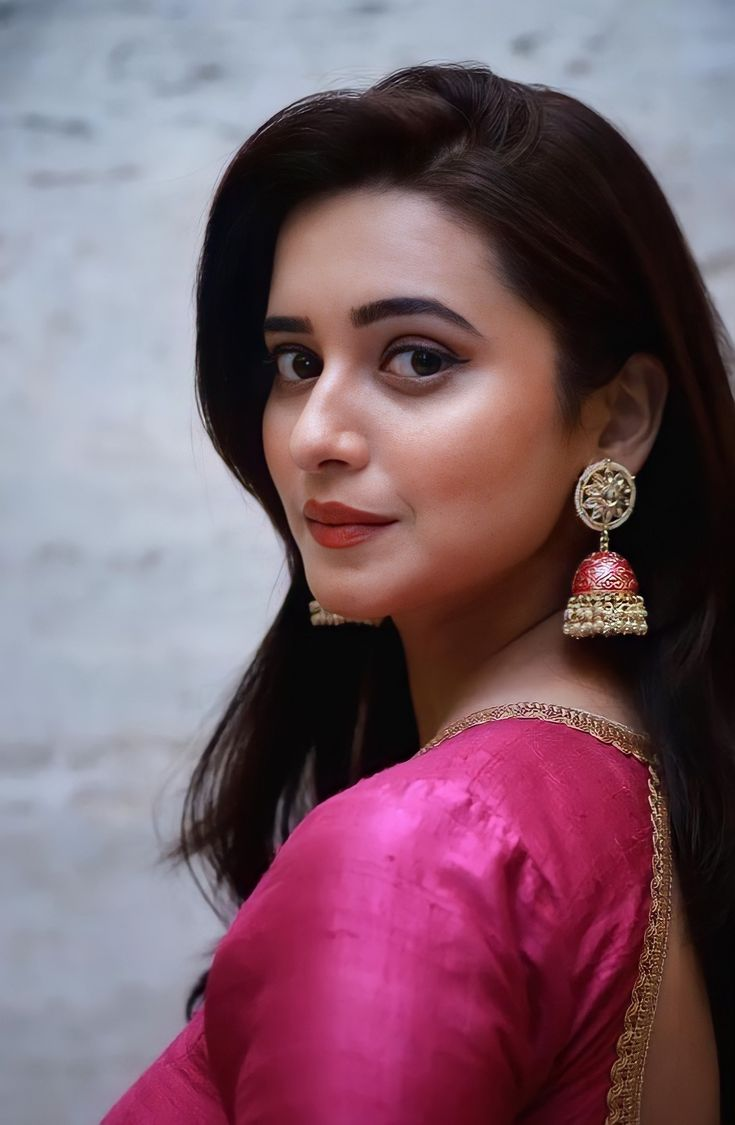

In [72]:
import PIL.Image
img = PIL.Image.open('image.jpg')
img

In [77]:
# lets use Gemini pro vision model
model = genai.GenerativeModel('models/gemini-1.5-flash-latest')

In [83]:
response = model.generate_content(img)

to_markdown(response.text)

# this is not working I dont know why

BadRequest: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-1.5-flash-latest:generateContent?%24alt=json%3Benum-encoding%3Dint: Unable to submit request because it must have a text parameter. Add a text parameter and try again. Learn more: https://cloud.google.com/vertex-ai/generative-ai/docs/model-reference/gemini

In [81]:
response = model.generate_content(["Write a short, engaging blog post based on the actress in image", img], stream=True)
response.resolve()

In [82]:
to_markdown(response.text)

>Here's a short blog post based on the image of the actress:
>
>**Stunning in Scarlet: A Glimpse of [Actress's Name]'s Elegance**
>
>[Actress's Name] – a name synonymous with grace and captivating beauty – recently mesmerized us with a stunning appearance  *  This picture captures her in a moment of quiet elegance, her dark hair cascading around her shoulders, framing a face that exudes both poise and warmth  *  Clad in a vibrant fuchsia silk blouse, accented with delicate gold detailing at the neckline, she effortlessly embodies modern sophistication  *  The crimson and gold of her earrings perfectly complement the rich color of her outfit, adding a touch of regal charm  *
>
>The image is not just about clothes; it's a testament to a captivating persona  *  Her captivating gaze hints at a depth of character that resonates beyond the screen  *  It's a snapshot of an actress at her most poised, reminding us of the power of effortless beauty  *  We eagerly await her next project, hoping to see more of this enchanting star shine  *
